In [4]:
import cv2
import numpy as np
import pafy
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
!pip install pafy
!pip install youtube_dl

Task - 1

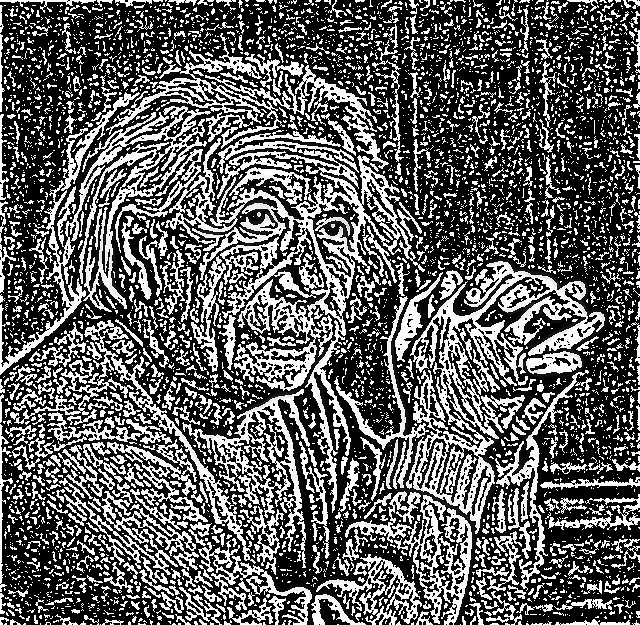

In [ ]:
img = cv2.imread('einstein.jpg',0)
blur_gaus1 = cv2.GaussianBlur(img,(5,5),0,0)
blur_gaus2 = cv2.GaussianBlur(img,(9,9),2,2)
cv2_imshow(blur_gaus2 - blur_gaus1)

Task - 2

In [6]:
barrel_img = cv2.imread('barrel.png',1)
barrel_HSV_img = cv2.cvtColor(barrel_img,cv2.COLOR_BGR2HSV)

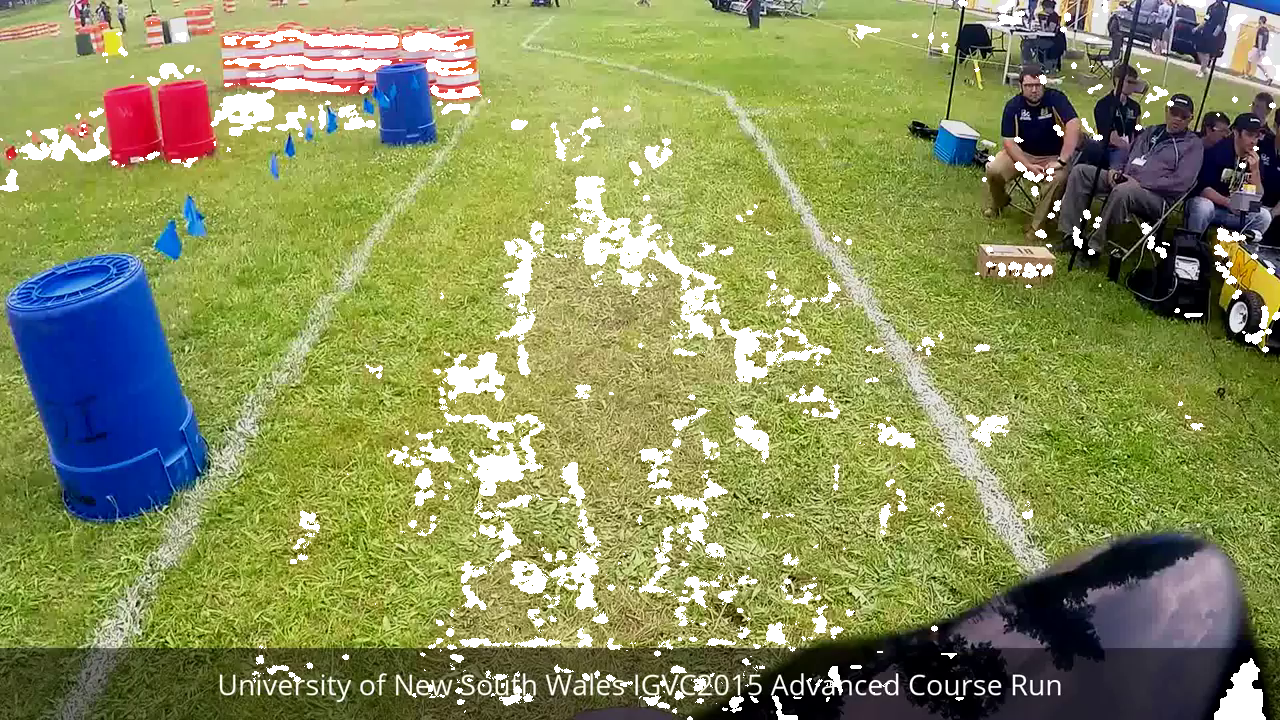

In [16]:
url = "https://www.youtube.com/watch?v=A9BVr7kltl8"
video = pafy.new(url)
best = video.getbest(preftype="mp4")

cap = cv2.VideoCapture(best.url)

while(True):
    ret, frame = cap.read()
    frame_HSV = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)

    # Region of interest 
    M = cv2.calcHist([barrel_HSV_img],[0, 1], None, [180, 256], [0, 180, 0, 256] )
    cv2.normalize(M,M,0,255,cv2.NORM_MINMAX)
    B = cv2.calcBackProject([frame_HSV],[0,1],M,[0,180,0,256],1)

    disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
    cv2.filter2D(B,-1,disc,B)
    B = np.uint8(B)
    cv2.normalize(B,B,0,255,cv2.NORM_MINMAX)

    ret,thresh = cv2.threshold(B,50,255,0)

    # Overlay images using bitwise_or
    thresh = cv2.merge((thresh,thresh,thresh))
    res = cv2.bitwise_or(frame,thresh)
 
    # Display the output
    cv2_imshow(res)
    cv2.waitKey(0)
    if cv2.waitKey(1) & 0xFF == ord('q'):
          break

cap.release()
cv2.destroyAllWindows()

